In [66]:
#reload source files automatically
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [67]:
import sklearn
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import sklearn
import sklearn.neighbors
import sklearn.metrics
from __future__ import print_function

from lime_time_series import *

In [68]:
# read dataset
train = pd.read_csv('time_series/Trace_TRAIN', header=None)
test = pd.read_csv('time_series/Trace_TEST', header=None)
train = train[train[0]>2].reset_index().drop(['index'], axis=1)
test = test[test[0]>2].reset_index().drop(['index'], axis=1)

Y_columns = [0]
Y_train = train[Y_columns]
X_train = train.drop(Y_columns, axis=1)
Y_test = test[Y_columns]
X_test = test.drop(Y_columns, axis=1)

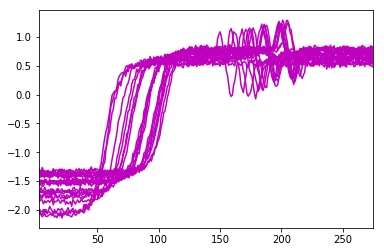

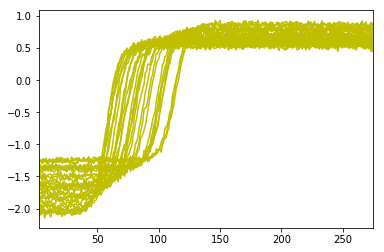

In [69]:
#train[train[0]==1].transpose()[1:].plot(legend=False, color='k')
#plt.show()
#train[train[0]==2].transpose()[1:].plot(legend=False, color='c')
#plt.show()
train[train[0]==3].transpose()[2:].plot(legend=False, color='m')
plt.show()
train[train[0]==4].transpose()[2:].plot(legend=False, color='y')
plt.show()
#test[test[0]==1].transpose()[1:].plot(legend=False, color='y')
#plt.show()

In [70]:
def DTWDistance(s1, s2):
    DTW={}

    for i in range(len(s1)):
        DTW[(i, -1)] = float('inf')
    for i in range(len(s2)):
        DTW[(-1, i)] = float('inf')
    DTW[(-1, -1)] = 0

    for i in range(len(s1)):
        for j in range(len(s2)):
            dist= (s1[i]-s2[j])**2
            DTW[(i, j)] = dist + min(DTW[(i-1, j)],DTW[(i, j-1)], DTW[(i-1, j-1)])

    return math.sqrt(DTW[len(s1)-1, len(s2)-1])

In [71]:
def DTWDistance_windowed(s1, s2):
    DTW={}

    w = max(10, abs(len(s1)-len(s2)))

    for i in range(-1,len(s1)):
        for j in range(-1,len(s2)):
            DTW[(i, j)] = float('inf')
    DTW[(-1, -1)] = 0

    for i in range(len(s1)):
        for j in range(max(0, i-w), min(len(s2), i+w)):
            dist= (s1[i]-s2[j])**2
            DTW[(i, j)] = dist + min(DTW[(i-1, j)],DTW[(i, j-1)], DTW[(i-1, j-1)])

    return math.sqrt(DTW[len(s1)-1, len(s2)-1])

In [72]:
kNN = sklearn.neighbors.KNeighborsClassifier(metric=DTWDistance_windowed)
kNN.fit(X_train, Y_train.values.ravel())

KNeighborsClassifier(algorithm='auto', leaf_size=30,
           metric=<function DTWDistance_windowed at 0x7f907b380840>,
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [73]:
pred = kNN.predict(X_test[0:10])

In [74]:
pred

array([3, 3, 3, 4, 3, 4, 3, 3, 4, 3])

In [75]:
sklearn.metrics.accuracy_score(Y_test[0:10].values.ravel(), pred)

0.90000000000000002

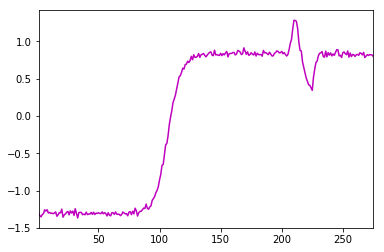

In [76]:
test_series_index = 0
instance_to_predict = X_test.iloc[test_series_index]
instance_to_predict.plot(legend=False, color='m')
plt.show()

In [87]:
explainer = LimeTimeSeriesExplainer()

FEATURE 1:


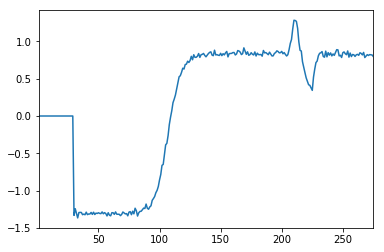

FEATURE 2:


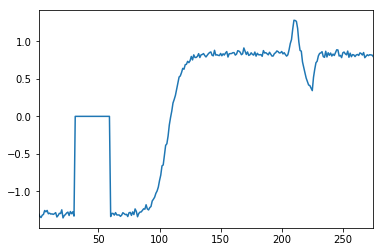

FEATURE 3:


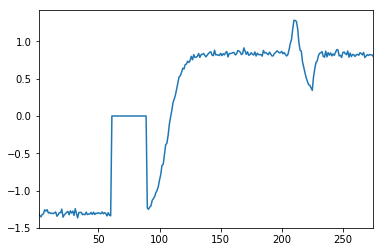

FEATURE 4:


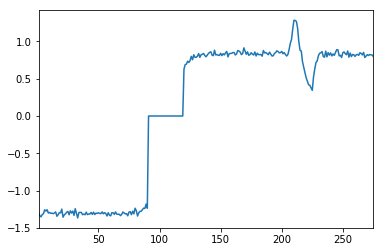

FEATURE 5:


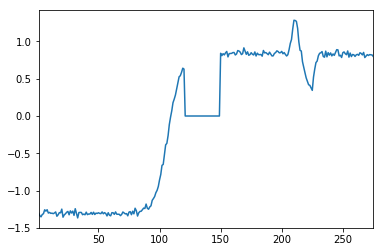

FEATURE 6:


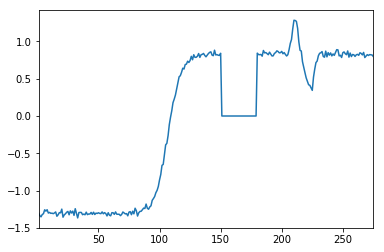

FEATURE 7:


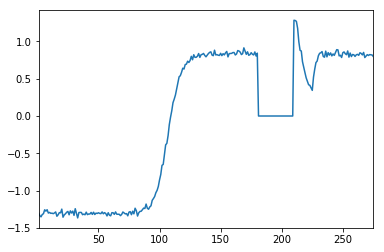

FEATURE 8:


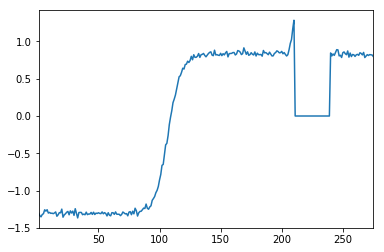

FEATURE 9:


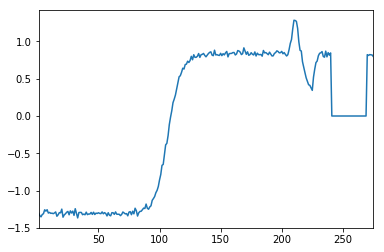

[5 0 1 1 1 4 4 6 1 6 4 1 4 0 5 0 4 1 1 4 3 4 1 5 2 4 4 4 1 7 2 6 2 5 5 5 0
 0 6 1 6 1 7 7 7 1 3 0 1 4 3 5 6 4 0 6 5 5 1 4 4 4 5 7 2 2 2 2 7 7 0 1 1 4
 5 3 2 6 6 7 6 5 6 3 6 2 1 5 7 1 6 4 4 0 0 3 5 2 0]
[[ 0.8  0.2]
 [ 0.4  0.6]
 [ 0.8  0.2]
 [ 1.   0. ]
 [ 1.   0. ]
 [ 0.4  0.6]
 [ 0.8  0.2]
 [ 0.4  0.6]
 [ 1.   0. ]
 [ 0.4  0.6]
 [ 1.   0. ]
 [ 0.4  0.6]
 [ 0.8  0.2]
 [ 1.   0. ]
 [ 0.8  0.2]
 [ 0.4  0.6]
 [ 0.8  0.2]
 [ 1.   0. ]
 [ 1.   0. ]
 [ 0.8  0.2]
 [ 1.   0. ]
 [ 0.6  0.4]
 [ 1.   0. ]
 [ 0.4  0.6]
 [ 0.8  0.2]
 [ 0.4  0.6]
 [ 0.4  0.6]
 [ 1.   0. ]
 [ 0.2  0.8]
 [ 0.4  0.6]
 [ 0.   1. ]
 [ 1.   0. ]
 [ 0.4  0.6]
 [ 1.   0. ]
 [ 0.4  0.6]
 [ 0.6  0.4]
 [ 0.6  0.4]
 [ 0.8  0.2]
 [ 0.8  0.2]
 [ 0.4  0.6]
 [ 1.   0. ]
 [ 0.4  0.6]
 [ 1.   0. ]
 [ 0.4  0.6]
 [ 1.   0. ]
 [ 1.   0. ]
 [ 0.4  0.6]
 [ 0.4  0.6]
 [ 0.8  0.2]
 [ 1.   0. ]
 [ 0.2  0.8]
 [ 1.   0. ]
 [ 1.   0. ]
 [ 1.   0. ]
 [ 1.   0. ]
 [ 0.8  0.2]
 [ 1.   0. ]
 [ 0.4  0.6]
 [ 0.6  0.4]
 [ 0.4  0.6]
 [ 0.   1. ]
 [ 1.

In [90]:
test_series_index = 0
exp = explainer.explain_instance(X_test.iloc[[test_series_index]], kNN.predict_proba, num_features=9, num_ranges=9, num_samples=100)
print('Series id: %d' % test_series_index)
print('Probabilities: ', kNN.predict_proba([X_test.iloc[test_series_index]]))
print('True class: %s' % Y_test.iloc[test_series_index, 0])

In [89]:
features = exp.as_list()
features.sort(key=lambda x: x[1], reverse=True)
print(features)

[(8, 0.10050067540329112), (0, 0.058543682042879581), (6, 0.038544866652634659), (4, 0.038364405422628374), (2, 0.0028019071911620469), (9, -0.010211072541825928), (3, -0.021456012872485348), (7, -0.042029694522505143), (5, -0.092537481090326709), (1, -0.16111177444502581)]
